/tmp/ipython-input-3541984809.py:17: ParserWarning: Skipping line 4114: unexpected end of data

  df = pd.read_csv('covid.csv', engine='python', on_bad_lines='warn')   # ❁️ change name if needed


Shape: (4112, 27)

Missing values:
 Rank                          0
NCT Number                    0
Title                         0
Acronym                    2229
Status                        0
Study Results                 0
Conditions                    0
Interventions               645
Outcome Measures             24
Sponsor/Collaborators         0
Gender                        5
Age                           0
Phases                     1865
Enrollment                   24
Funded Bys                    0
Study Type                    0
Study Designs                25
Other IDs                     0
Start Date                   24
Primary Completion Date      24
Completion Date              24
First Posted                  0
Results First Posted       4085
Last Update Posted            0
Locations                   402
Study Documents            3994
URL                           0
dtype: int64


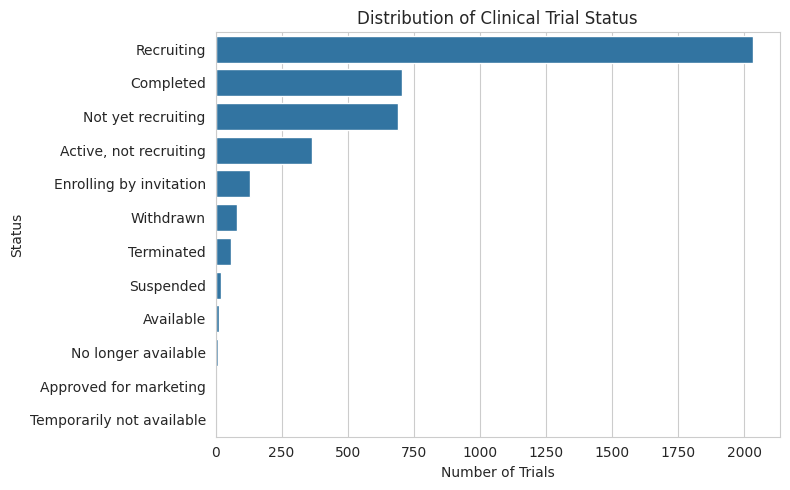

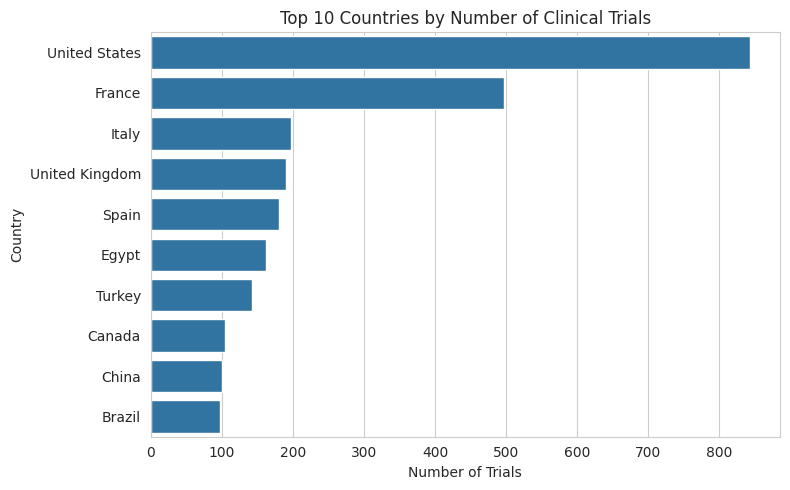

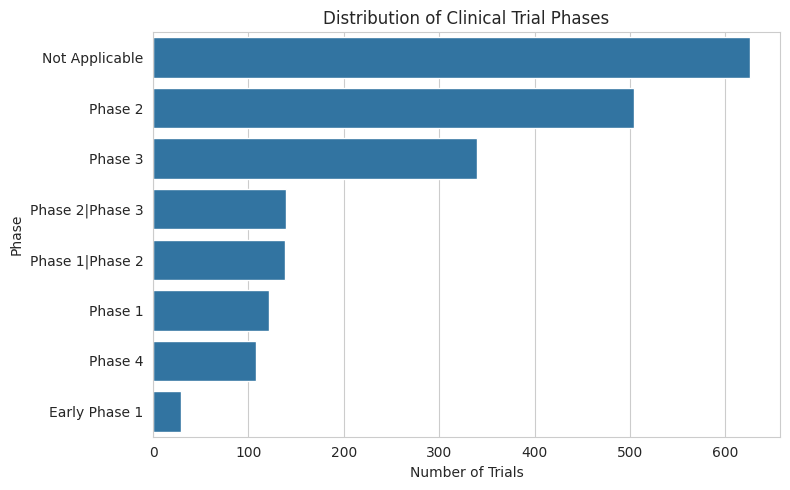

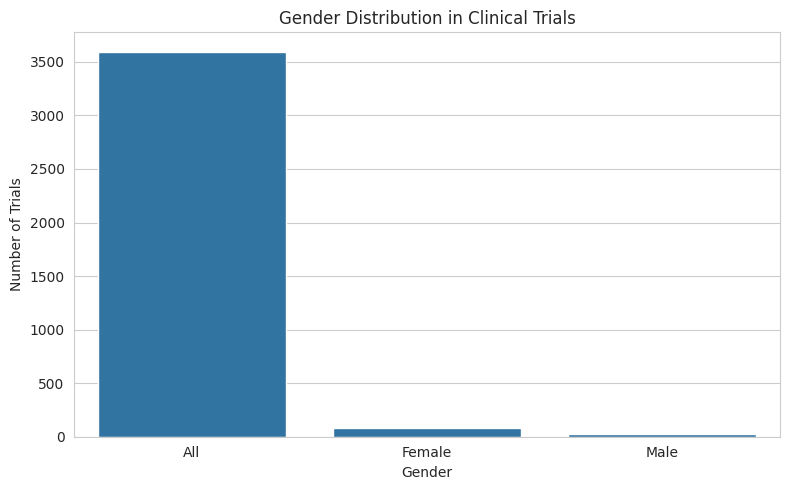

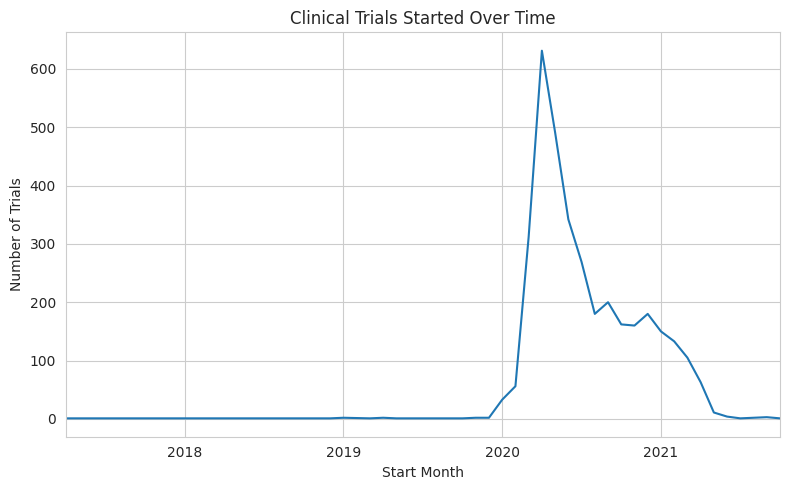


✔ All errors fixed and analysis completed successfully.


In [3]:
# ===============================
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings for PDF safety
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

# ===============================
# LOAD DATA
# ===============================
df = pd.read_csv('covid.csv', engine='python', on_bad_lines='warn')   # ❁️ change name if needed

# ===============================
# BASIC CHECKS
# ===============================
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())

# ===============================
# STATUS DISTRIBUTION
# ===============================
status_counts = df['Status'].value_counts()

plt.figure()
sns.barplot(x=status_counts.values, y=status_counts.index)
plt.title('Distribution of Clinical Trial Status')
plt.xlabel('Number of Trials')
plt.ylabel('Status')
plt.tight_layout()
plt.show()

# ===============================
# COUNTRY-WISE ANALYSIS (FIXED)
# ===============================
df['Country'] = (
    df['Locations']
    .astype(str)
    .apply(lambda x: x.split(',')[-1].strip())
)

# Remove invalid countries
df = df[df['Country'].notna()]
df = df[df['Country'] != 'nan']
df = df[df['Country'] != '']

top_countries = df['Country'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Clinical Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# ===============================
# PHASE DISTRIBUTION
# ===============================
phase_counts = df['Phases'].value_counts()

plt.figure()
sns.barplot(x=phase_counts.values, y=phase_counts.index)
plt.title('Distribution of Clinical Trial Phases')
plt.xlabel('Number of Trials')
plt.ylabel('Phase')
plt.tight_layout()
plt.show()

# ===============================
# GENDER DISTRIBUTION
# ===============================
gender_counts = df['Gender'].value_counts()

plt.figure()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution in Clinical Trials')
plt.xlabel('Gender')
plt.ylabel('Number of Trials')
plt.tight_layout()
plt.show()

# ===============================
# TIME SERIES ANALYSIS
# ===============================
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

trials_over_time = (
    df['Start Date']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
)

plt.figure()
trials_over_time.plot()
plt.title('Clinical Trials Started Over Time')
plt.xlabel('Start Month')
plt.ylabel('Number of Trials')
plt.tight_layout()
plt.show()

# ===============================
# SAVE CLEAN DATASET
# ===============================
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)

print("\n✔ All errors fixed and analysis completed successfully.")